## Assignment 2: Time Series Forecasting

### \<your name> \<your id>

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

### 1. Read the dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


assign_2=pd.read_csv('./energydata_complete.csv')

### 2. Analyse and visualise the data

In [2]:
assign_2.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [3]:
assign_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [4]:
print("The number of rows in dataset is - ", assign_2.shape[0])
print("The number of coluns in datasaet is - ",assign_2.shape[1])

The number of rows in dataset is -  19735
The number of coluns in datasaet is -  29


In [5]:
assign_2.isnull().sum().sort_values(ascending=True)

date           0
Tdewpoint      0
Visibility     0
Windspeed      0
RH_out         0
Press_mm_hg    0
T_out          0
RH_9           0
T9             0
RH_8           0
T8             0
RH_7           0
T7             0
rv1            0
RH_6           0
RH_5           0
T5             0
RH_4           0
T4             0
RH_3           0
T3             0
RH_2           0
T2             0
RH_1           0
T1             0
lights         0
Appliances     0
T6             0
rv2            0
dtype: int64

In [6]:
train,test=train_test_split(assign_2,test_size=0.25,random_state=40)

In [7]:
col_time=["date"]
col_temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]

col_hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]

col_weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg",
                "Windspeed","Visibility"] 
col_light = ["lights"]

col_randoms = ["rv1", "rv2"]

col_target = ["Appliances"]

In [8]:
feature_vars=train[col_time+col_temp+col_hum+col_light+col_weather+col_randoms]
target_vars=train[col_target]

In [9]:
feature_vars.lights.value_counts()

0     11438
10     1649
20     1230
30      414
40       64
50        5
60        1
Name: lights, dtype: int64

In [10]:
_=feature_vars.drop(['lights'],axis=1,inplace=True) 

In [11]:
feature_vars.head()

date     T1         T2         T3         T4         T5  \
9544   2016-03-17 23:40:00  22.60  19.500000  21.500000  22.890000  19.166667   
19366  2016-05-25 04:40:00  23.70  21.000000  25.390000  23.600000  19.890000   
10816  2016-03-26 19:40:00  22.20  20.463333  23.000000  20.390000  19.856667   
15457  2016-04-28 01:10:00  21.29  18.230000  21.290000  20.533333  19.290000   
2956   2016-02-01 05:40:00  21.29  20.290000  21.666667  18.790000  19.475556   

              T6         T7         T8         T9  ...   RH_8       RH_9  \
9544    2.863333  21.000000  22.890000  19.890000  ...  38.50  37.260000   
19366   5.500000  23.000000  24.200000  22.600000  ...  43.40  44.590000   
10816  13.566667  20.890000  23.633333  19.963333  ...  43.80  41.363333   
15457   0.066667  19.500000  22.200000  18.890000  ...  42.95  35.863333   
2956   10.800000  19.044444  20.926667  17.600000  ...  57.50  52.900000   

           T_out  Tdewpoint     RH_out  Press_mm_hg  Windspeed  Visibility  \
9544    2.233333   0.400000  87.666667   764.200000   1.333333   61.000000   
19366   6.266667   5.300000  93.666667   757.233333   1.000000   25.333333   
10816  13.366667   7.133333  66.333333   750.133333   6.333333   40.000000   
15457   0.316667  -0.450000  94.333333   755.216667   2.000000   20.166667   
2956   10.766667   9.633333  92.666667   758.666667   6.666667   59.000000   

             rv1        rv2  
9544   43.195492  43.195492  
19366  46.369677  46.369677  
10816  25.722968  25.722968  
15457   3.791656   3.791656  
2956    8.706206   8.706206  

[5 rows x 27 columns]

In [12]:
import chart_studio.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

data=go.Scatter(x=assign_2.date,mode="lines",y=assign_2.Appliances)
layout=go.Layout(title='Appliance energy consumption pattern',xaxis=dict(title='Date'),yaxis=dict(title='(Wh)'))
fig=go.Figure(data=[data],layout=layout)
iplot(fig)

In [13]:
assign_2['WEEKDAY']=((pd.to_datetime(assign_2['date']).dt.dayofweek)//5==1).astype(float)
assign_2['WEEKDAY'].value_counts()

0.0    14263
1.0     5472
Name: WEEKDAY, dtype: int64

In [14]:
# Find rows with weekday 
temp_weekday = assign_2[assign_2['WEEKDAY'] == 0]
# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= temp_weekday.date  ,  mode = "lines", y = temp_weekday.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern on weekdays' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

In [15]:
temp_weekend =  assign_2[assign_2['WEEKDAY'] == 1]

# To understand the timeseries variation of the applaince energy consumption
visData = go.Scatter( x= temp_weekend.date  ,  mode = "lines", y = temp_weekend.Appliances )
layout = go.Layout(title = 'Appliance energy consumption pattern on weekend' , xaxis=dict(title='Date'), yaxis=dict(title='(Wh)'))
fig = go.Figure(data=[visData],layout=layout)

iplot(fig)

array([[<Axes: title={'center': 'T1'}>, <Axes: title={'center': 'T2'}>,
        <Axes: title={'center': 'T3'}>, <Axes: title={'center': 'T4'}>,
        <Axes: title={'center': 'T5'}>],
       [<Axes: title={'center': 'T6'}>, <Axes: title={'center': 'T7'}>,
        <Axes: title={'center': 'T8'}>, <Axes: title={'center': 'T9'}>,
        <Axes: title={'center': 'RH_1'}>],
       [<Axes: title={'center': 'RH_2'}>,
        <Axes: title={'center': 'RH_3'}>,
        <Axes: title={'center': 'RH_4'}>,
        <Axes: title={'center': 'RH_5'}>,
        <Axes: title={'center': 'RH_6'}>],
       [<Axes: title={'center': 'RH_7'}>,
        <Axes: title={'center': 'RH_8'}>,
        <Axes: title={'center': 'RH_9'}>,
        <Axes: title={'center': 'T_out'}>,
        <Axes: title={'center': 'Tdewpoint'}>],
       [<Axes: title={'center': 'RH_out'}>,
        <Axes: title={'center': 'Press_mm_hg'}>,
        <Axes: title={'center': 'Windspeed'}>,
        <Axes: title={'center': 'Visibility'}>,
        <Axe

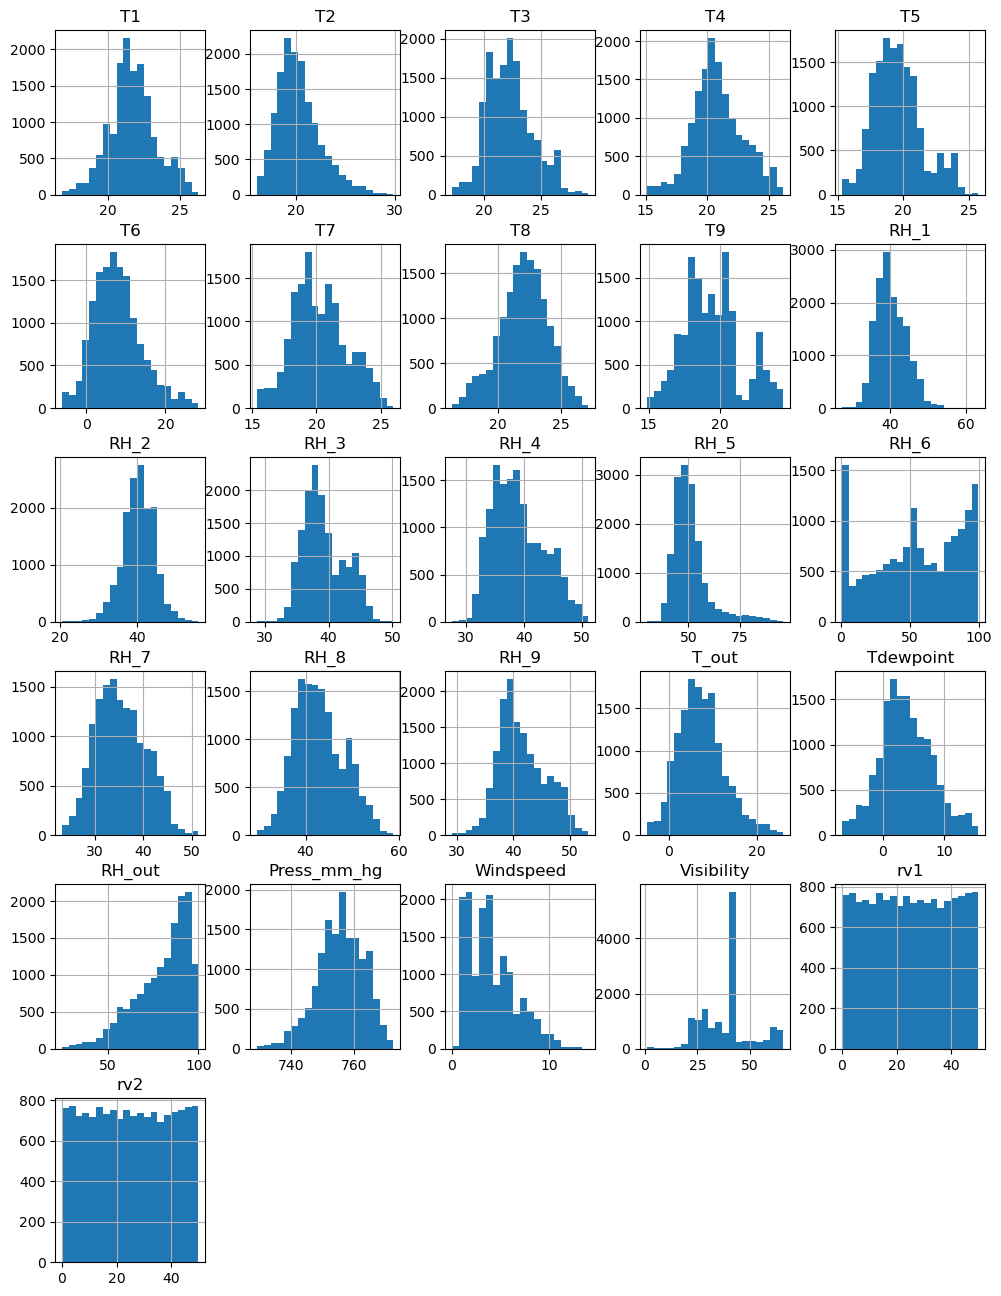

In [16]:
feature_vars.hist(bins=20,figsize=(12,16))

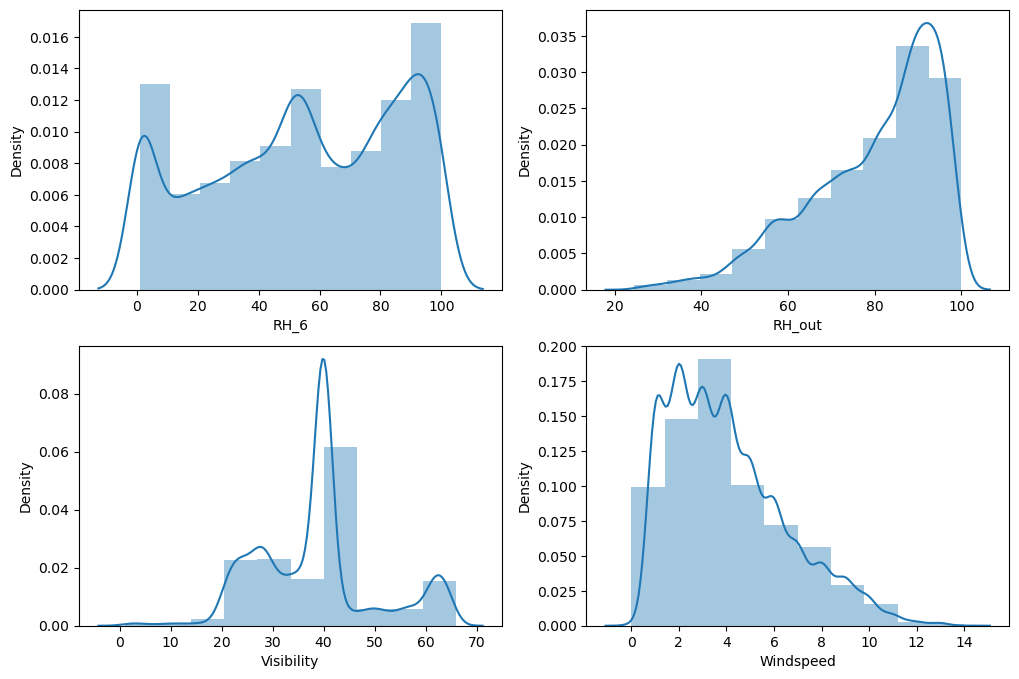

In [17]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(feature_vars["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(feature_vars["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(feature_vars["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(feature_vars["Windspeed"],bins=10, ax=ax[1][1])

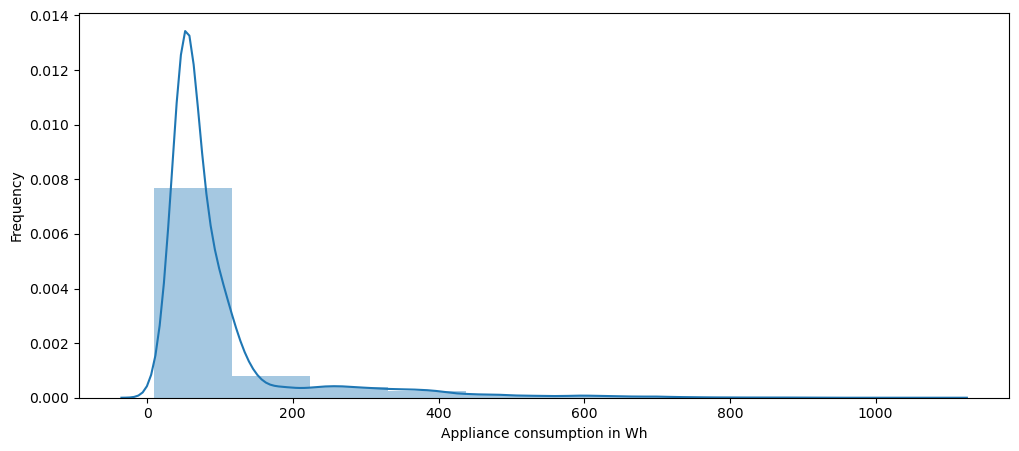

In [18]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(target_vars , bins=10 ) ;

In [19]:
#sns.pairplot(assign_2)

In [20]:
#sns.pairplot(feature_vars)

In [21]:
#Appliance column range with consumption less than 200 Wh
print('Percentage of the appliance consumption is less than 200 Wh')
print(((target_vars[target_vars <= 200].count()) / (len(target_vars)))*100 )

Percentage of the appliance consumption is less than 200 Wh
Appliances    90.250659
dtype: float64


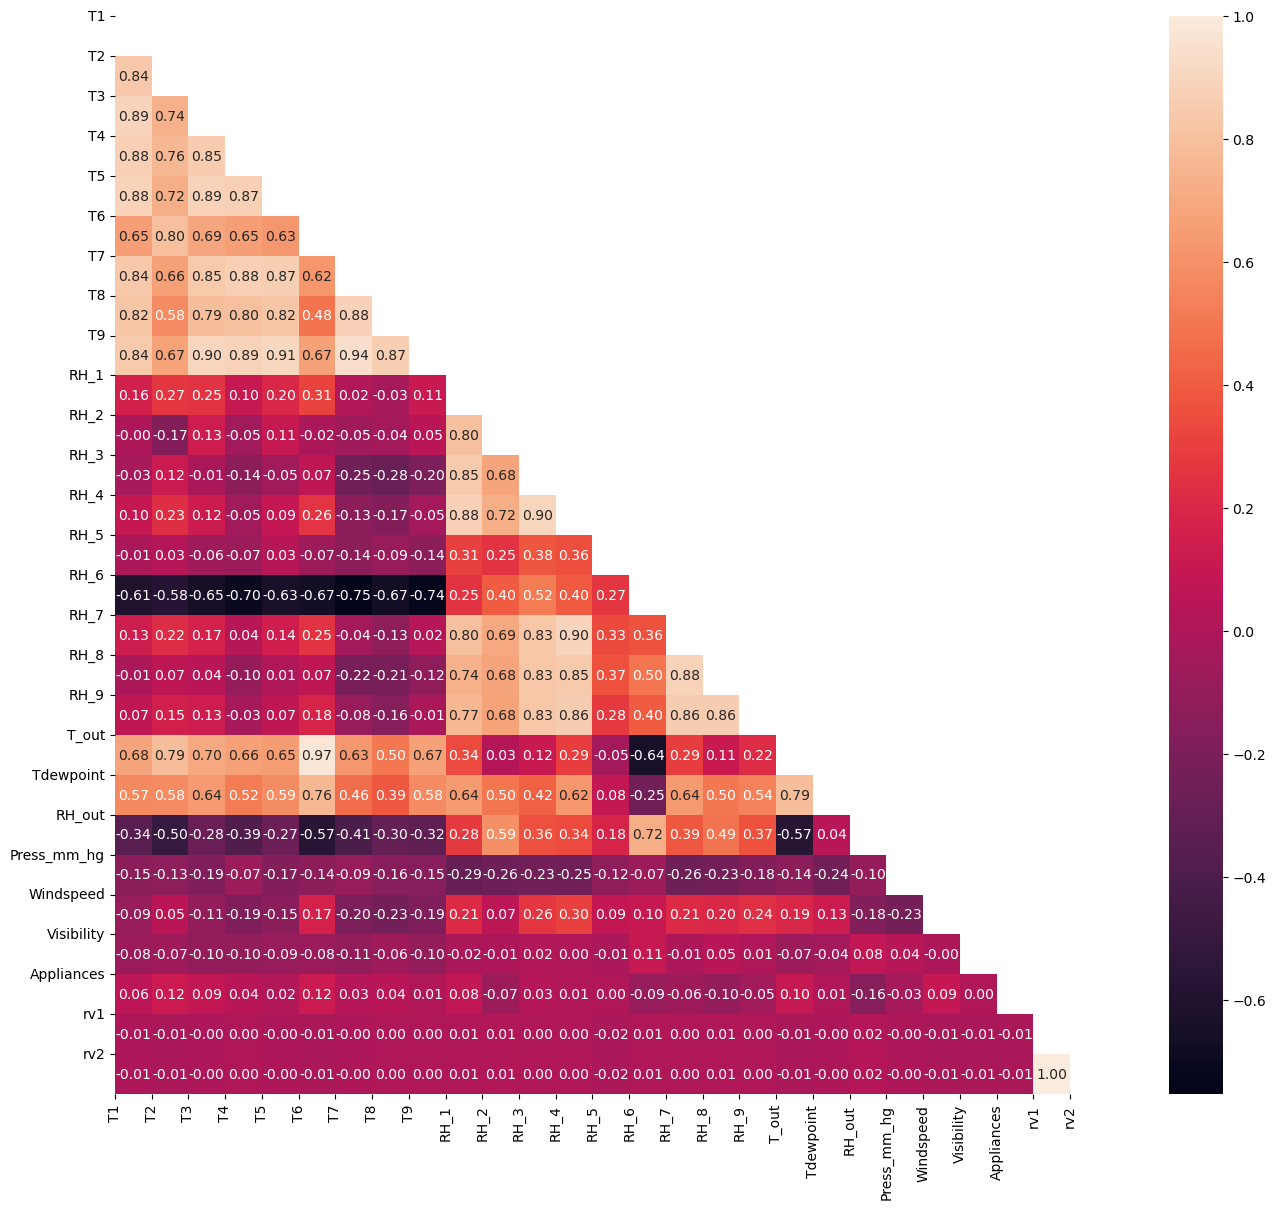

In [22]:
train_corr = train[col_temp + col_hum + col_weather +col_target+col_randoms]
corr = train_corr.corr()
# Mask the repeated values
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
  
f, ax = plt.subplots(figsize=(16, 14))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f" , mask=mask,)
    #Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
plt.show()

In [23]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

# Function to get top correlations 

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(train_corr, 40))


Top Absolute Correlations
rv1   rv2      1.000000
T6    T_out    0.974683
T7    T9       0.943921
T5    T9       0.910009
T3    T9       0.900209
RH_3  RH_4     0.899889
RH_4  RH_7     0.895120
T1    T3       0.892292
T4    T9       0.888264
T3    T5       0.887545
RH_7  RH_8     0.884849
T1    T5       0.884692
T7    T8       0.881513
RH_1  RH_4     0.880504
T1    T4       0.876682
T4    T7       0.876677
      T5       0.871733
T5    T7       0.869655
T8    T9       0.868251
RH_7  RH_9     0.860155
RH_4  RH_9     0.858454
RH_8  RH_9     0.857476
T3    T4       0.851790
RH_4  RH_8     0.848829
T3    T7       0.846021
RH_1  RH_3     0.845592
T1    T9       0.842862
      T7       0.837079
      T2       0.835729
RH_3  RH_9     0.834419
      RH_7     0.833924
      RH_8     0.831060
T1    T8       0.824657
T5    T8       0.824057
T2    T6       0.801219
RH_1  RH_7     0.800827
      RH_2     0.797598
T4    T8       0.796458
T3    T8       0.794213
T2    T_out    0.791553
dtype: float64

### 3. Implement prediction models

In [103]:
#ARIMA

app=pd.read_csv("./energydata_complete.csv",parse_dates=True)

In [109]:
# Unix-time to 
app.Timestamp = pd.to_datetime(app.date)

# Resampling to daily frequency
app.index = app.Timestamp
app = app.resample('D').mean()

# Resampling to monthly frequency
app_month = app.resample('M').mean()
app.head()

Appliances     lights         T1       RH_1         T2       RH_2  \
date                                                                            
2016-01-11  136.666667  30.000000  20.808571  46.906210  20.153333  44.793175   
2016-01-12   85.694444   4.236111  20.092326  45.142014  19.307655  43.779733   
2016-01-13   97.013889   5.416667  19.197824  42.867772  18.568513  42.119669   
2016-01-14  151.388889   5.000000  20.372078  42.435191  19.743131  40.699172   
2016-01-15  125.347222   5.972222  22.280949  39.099294  21.528172  38.193897   

                   T3       RH_3         T4       RH_4  ...         T9  \
date                                                    ...              
2016-01-11  20.140972  45.992440  19.492222  47.260813  ...  16.918175   
2016-01-12  19.993646  44.933171  19.772778  44.556840  ...  17.032847   
2016-01-13  19.609213  43.720891  19.009803  42.315174  ...  16.953576   
2016-01-14  20.837581  43.399740  18.694271  43.231053  ...  16.884815   
2016-01-15  20.959074  41.409884  19.615127  41.961036  ...  17.345694   

                 RH_9     T_out  Press_mm_hg     RH_out  Windspeed  \
date                                                                 
2016-01-11  45.106210  5.922619   735.173810  89.285714   6.083333   
2016-01-12  45.680127  5.566319   742.628125  87.500000   5.784722   
2016-01-13  44.691476  4.856944   754.790625  83.406250   5.614583   
2016-01-14  45.428229  3.431944   749.767361  86.420139   6.277778   
2016-01-15  44.534329  2.665278   754.579861  88.385417   7.770833   

            Visibility  Tdewpoint        rv1        rv2  
date                                                     
2016-01-11   40.845238   4.228571  26.248800  26.248800  
2016-01-12   37.229167   3.596528  25.505072  25.505072  
2016-01-13   31.559028   2.169792  23.464726  23.464726  
2016-01-14   35.149306   1.316667  25.264569  25.264569  
2016-01-15   40.208333   0.849653  26.289515  26.289515  

[5 rows x 28 columns]

In [111]:
app_1=app['Appliances']
app_1.head()

date
2016-01-11    136.666667
2016-01-12     85.694444
2016-01-13     97.013889
2016-01-14    151.388889
2016-01-15    125.347222
Freq: D, Name: Appliances, dtype: float64

<Axes: xlabel='date'>

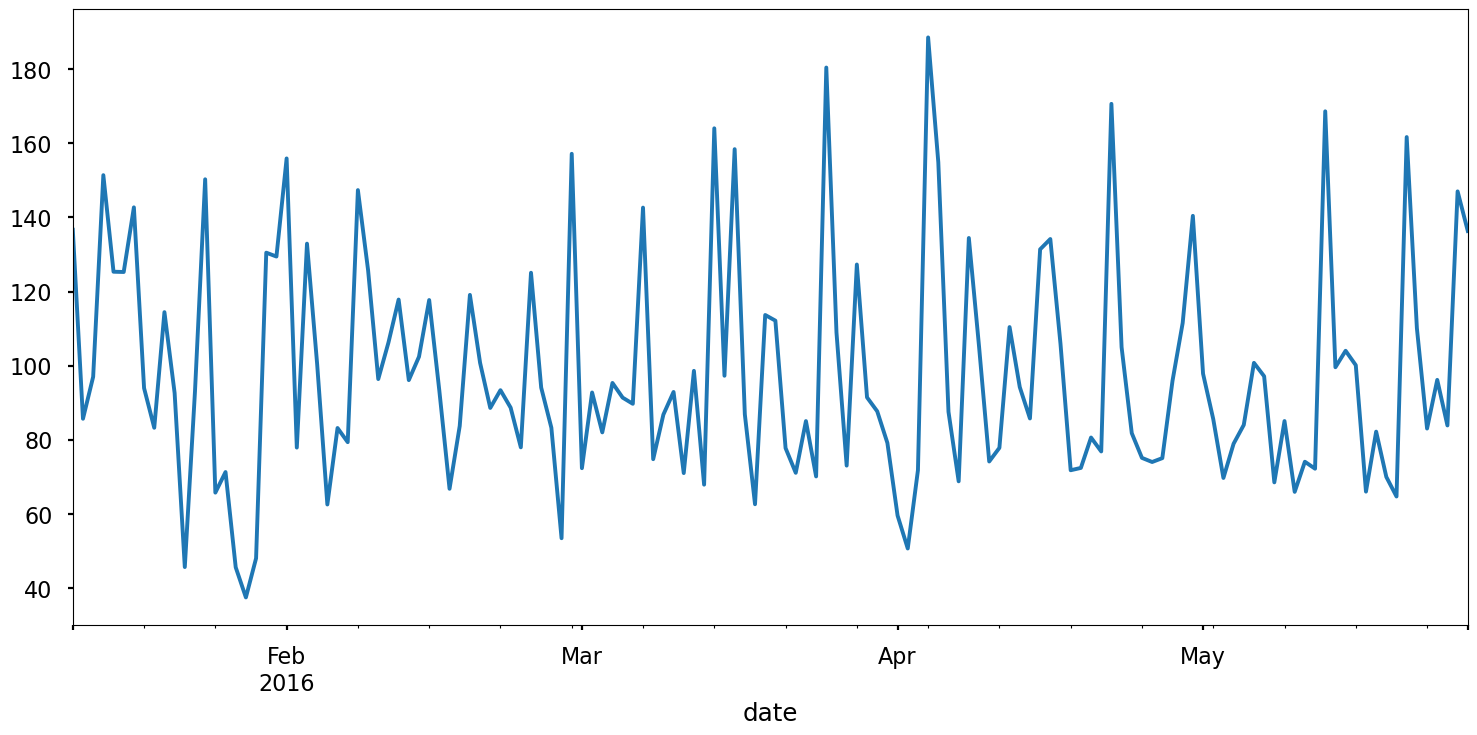

In [112]:
app_1.plot()

In [113]:
app_1_mean=app_1.rolling(window=7).mean()

<Axes: xlabel='date'>

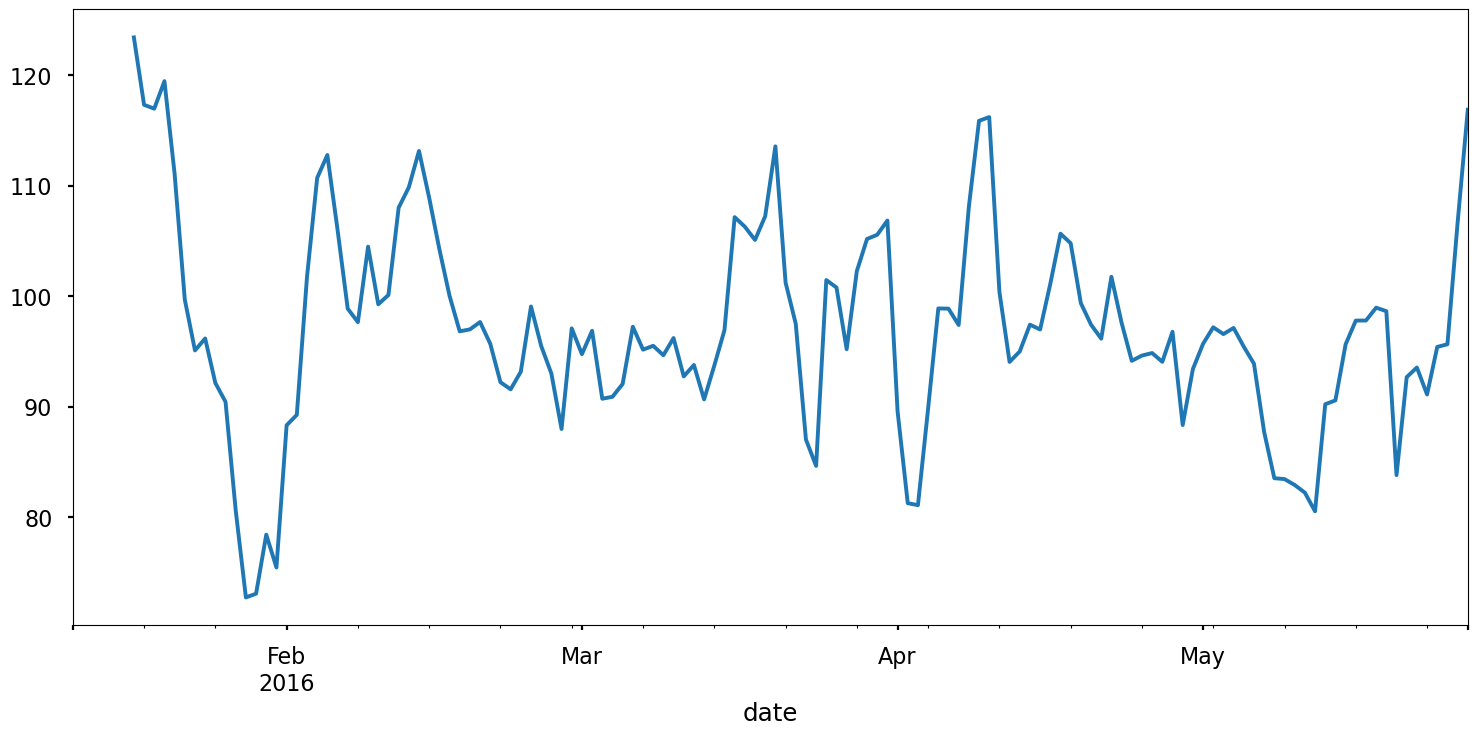

In [114]:
app_1_mean.plot()

In [115]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

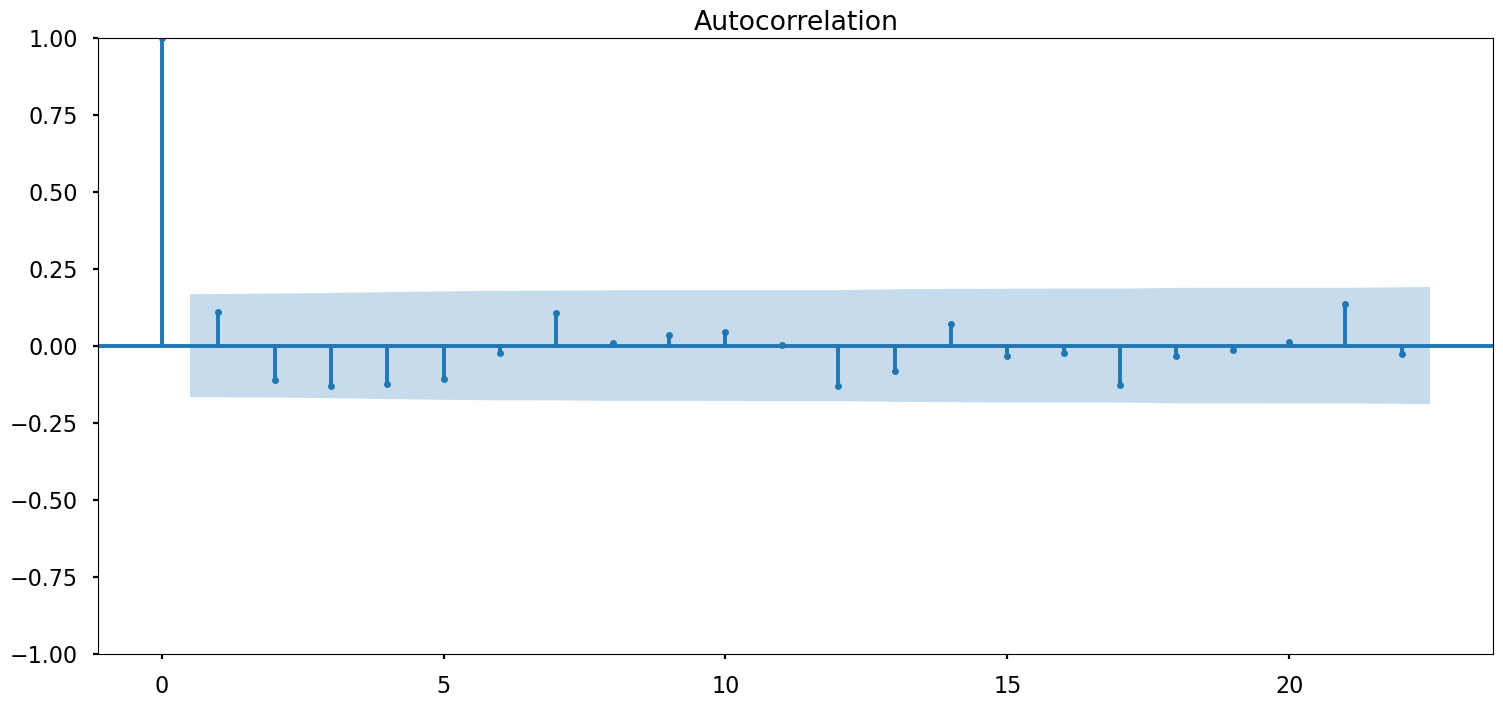

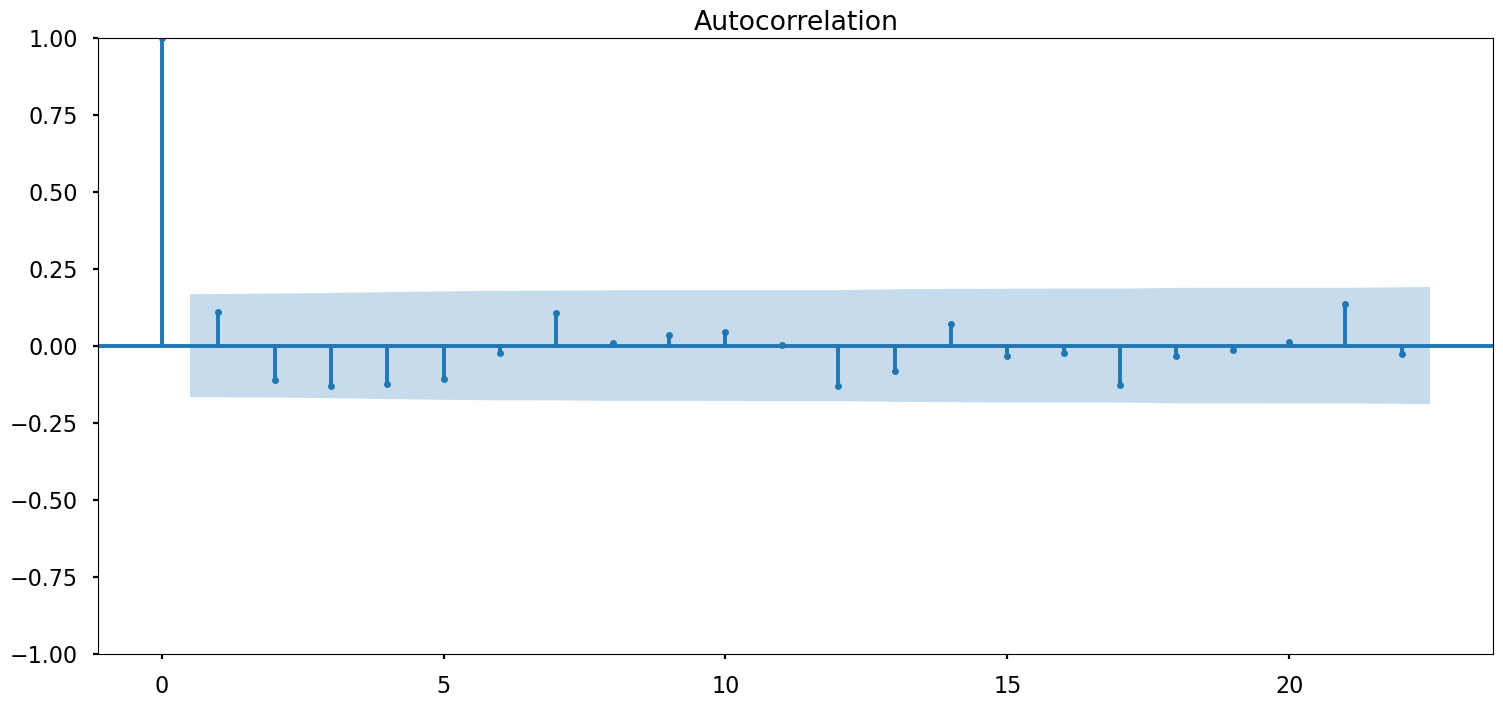

In [116]:
plot_acf(app_1)

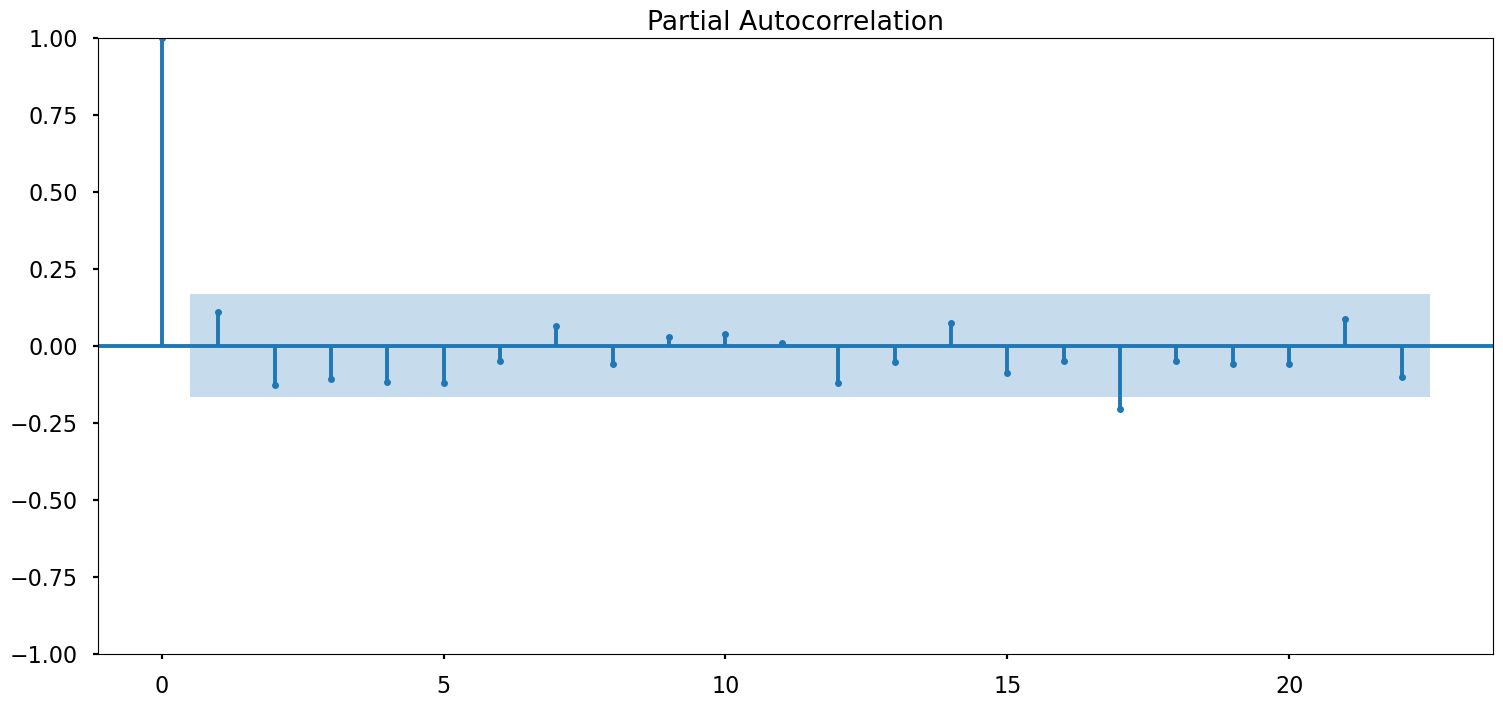

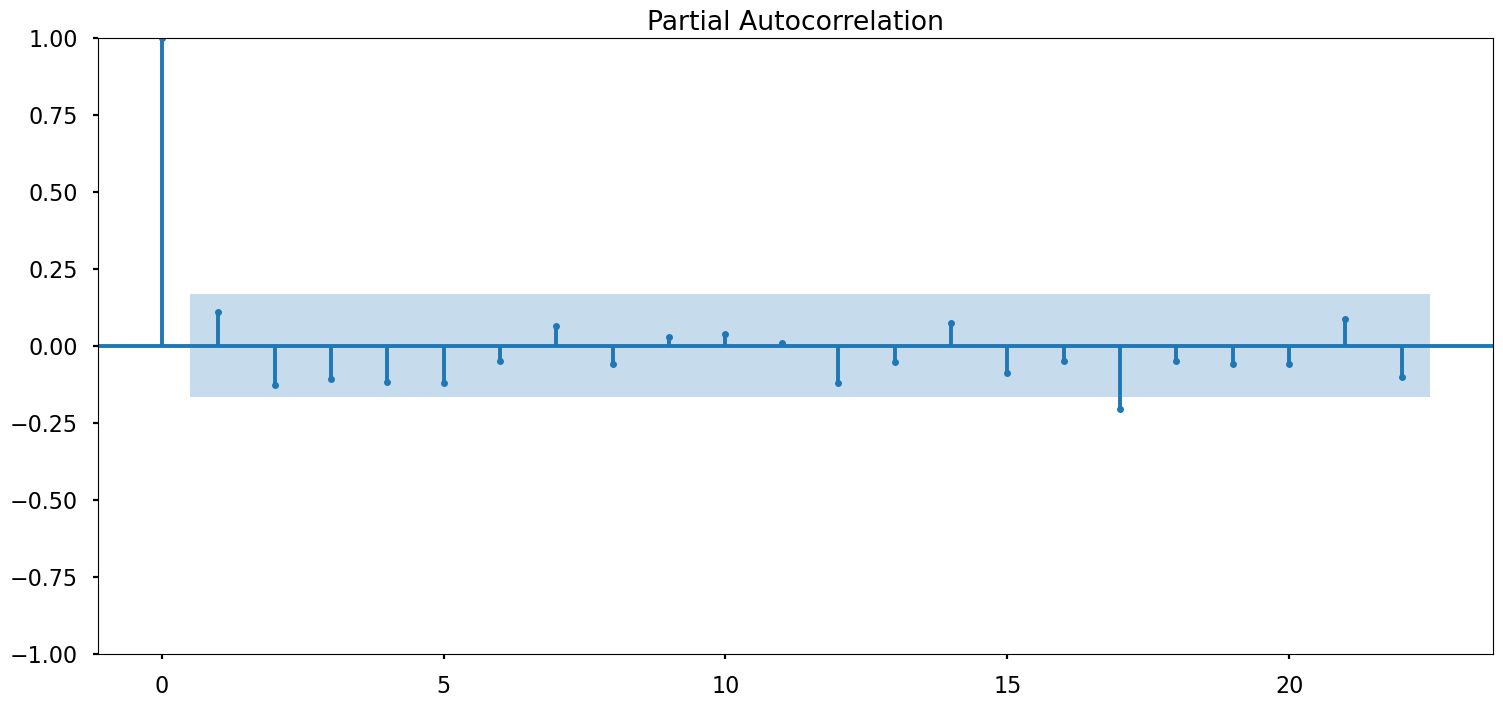

In [117]:
plot_pacf(app_1)

In [119]:
app_1.size

138

In [159]:
# Naive Bayes

series_time=app_1.values

In [162]:
value=pd.DataFrame(series_time)

In [163]:
app_df=pd.concat([value,value.shift(1)],axis=1)

In [165]:
app_df.columns=["actual","forecast"]

In [166]:
app_df.head()

actual    forecast
0  136.666667         NaN
1   85.694444  136.666667
2   97.013889   85.694444
3  151.388889   97.013889
4  125.347222  151.388889

In [167]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [169]:
app_test=app_df[1:]

In [174]:
app_test.tail()

actual    forecast
133   83.055556  110.138889
134   96.180556   83.055556
135   83.888889   96.180556
136  147.013889   83.888889
137  136.330275  147.013889

In [170]:
app_error=mean_squared_error(app_test.actual,app_test.forecast)

In [172]:
app_error

1632.055995835984

In [173]:
np.sqrt(app_error)

40.39871279924627

In [121]:
x_train=app_1[:125]
y_train=app_1[125:138]


In [146]:
y_train.size

13

In [126]:
from statsmodels.tsa.arima.model import ARIMA

In [143]:
app_model=ARIMA(x_train,order=(2,0,2))

In [144]:
app_model_fit=app_model.fit()

In [145]:
app_model_fit.aic

1207.1067003851356

In [177]:
##    LSTM


from math import sqrt
from sklearn.model_selection import train_test_split
from numpy import concatenate
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from pandas import to_datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from matplotlib import pyplot

In [178]:
values=data1.values
values.shape

(19735, 22)

In [179]:
# normalize features
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)

In [180]:
reframed = series_to_supervised(scaled, 1, 1)

In [181]:
reframed.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.046729   0.894737   0.661412   0.566187   0.215188   0.746066   
2   0.046729   0.894737   0.660155   0.541326   0.215188   0.748871   
3   0.037383   0.894737   0.655586   0.530502   0.215188   0.755569   
4   0.037383   0.894737   0.650788   0.524080   0.215188   0.758685   
5   0.046729   0.894737   0.650788   0.531419   0.215188   0.758685   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)  ...  var13(t)  var14(t)  \
1   0.225345   0.097674   0.684038    0.653428  ...  0.782437  0.381691   
2   0.225345   0.100000   0.682140    0.651064  ...  0.778062  0.380037   
3   0.225345   0.102326   0.679445    0.646572  ...  0.770949  0.380037   
4   0.225345   0.104651   0.678414    0.641489  ...  0.762697  0.380037   
5   0.225345   0.106977   0.676727    0.639362  ...  0.771233  0.379135   

   var15(t)  var16(t)  var17(t)  var18(t)  var19(t)  var20(t)  var21(t)  \
1  0.369239  0.678532  0.351351  0.170594  0.533937  0.476190   0.32735   
2  0.365488  0.676049  0.344745  0.170594  0.529412  0.452381   0.32735   
3  0.361736  0.671909  0.341441  0.164310  0.524887  0.428571   0.32735   
4  0.357985  0.671909  0.341441  0.170594  0.520362  0.404762   0.32735   
5  0.354234  0.667357  0.341441  0.164310  0.515837  0.380952   0.32735   

   var22(t)  
1  0.175506  
2  0.175506  
3  0.175506  
4  0.178691  
5  0.172320  

[5 rows x 44 columns]

In [182]:
reframed.drop(reframed.columns[[22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43]], axis=1, inplace=True)

In [183]:
values = reframed.values

In [184]:
X = values[:,:21]
Y = values[:,21]

In [185]:
X.shape

(19734, 21)

In [186]:
X

array([[0.04672897, 0.89473684, 0.66141193, ..., 0.53846154, 0.5       ,
        0.32734952],
       [0.04672897, 0.89473684, 0.66015536, ..., 0.53393665, 0.47619048,
        0.32734952],
       [0.03738318, 0.89473684, 0.65558602, ..., 0.52941176, 0.45238095,
        0.32734952],
       ...,
       [0.07476636, 0.42105263, 0.69191227, ..., 0.90045249, 0.25      ,
        0.91974657],
       [0.24299065, 0.4254386 , 0.68745716, ..., 0.89894419, 0.26190476,
        0.91974657],
       [0.38317757, 0.42982456, 0.68261652, ..., 0.8974359 , 0.27380952,
        0.91974657]])

In [187]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.3)

# reshape input to be 3D [samples, timesteps, features]
X_Train = X_Train.reshape((X_Train.shape[0], 1, X_Train.shape[1]))
X_Test = X_Test.reshape((X_Test.shape[0], 1, X_Test.shape[1]))

In [188]:
# network architecture
model = Sequential()
model.add(LSTM(50, input_shape=(X_Train.shape[1], X_Train.shape[2])))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

# fit
history = model.fit(X_Train, Y_Train, epochs=70, batch_size=10, validation_data=(X_Test, Y_Test), verbose=2, shuffle=False)

Epoch 1/70
1382/1382 - 5s - loss: 0.0050 - val_loss: 0.0035 - 5s/epoch - 4ms/step
Epoch 2/70
1382/1382 - 2s - loss: 0.0035 - val_loss: 0.0034 - 2s/epoch - 2ms/step
Epoch 3/70
1382/1382 - 2s - loss: 0.0034 - val_loss: 0.0033 - 2s/epoch - 2ms/step
Epoch 4/70
1382/1382 - 2s - loss: 0.0033 - val_loss: 0.0032 - 2s/epoch - 2ms/step
Epoch 5/70
1382/1382 - 2s - loss: 0.0032 - val_loss: 0.0030 - 2s/epoch - 2ms/step
Epoch 6/70
1382/1382 - 2s - loss: 0.0031 - val_loss: 0.0029 - 2s/epoch - 2ms/step
Epoch 7/70
1382/1382 - 3s - loss: 0.0029 - val_loss: 0.0028 - 3s/epoch - 2ms/step
Epoch 8/70
1382/1382 - 3s - loss: 0.0028 - val_loss: 0.0028 - 3s/epoch - 2ms/step
Epoch 9/70
1382/1382 - 2s - loss: 0.0027 - val_loss: 0.0027 - 2s/epoch - 2ms/step
Epoch 10/70
1382/1382 - 2s - loss: 0.0026 - val_loss: 0.0027 - 2s/epoch - 2ms/step
Epoch 11/70
1382/1382 - 3s - loss: 0.0026 - val_loss: 0.0026 - 3s/epoch - 2ms/step
Epoch 12/70
1382/1382 - 3s - loss: 0.0025 - val_loss: 0.0026 - 3s/epoch - 2ms/step
Epoch 13/70
1

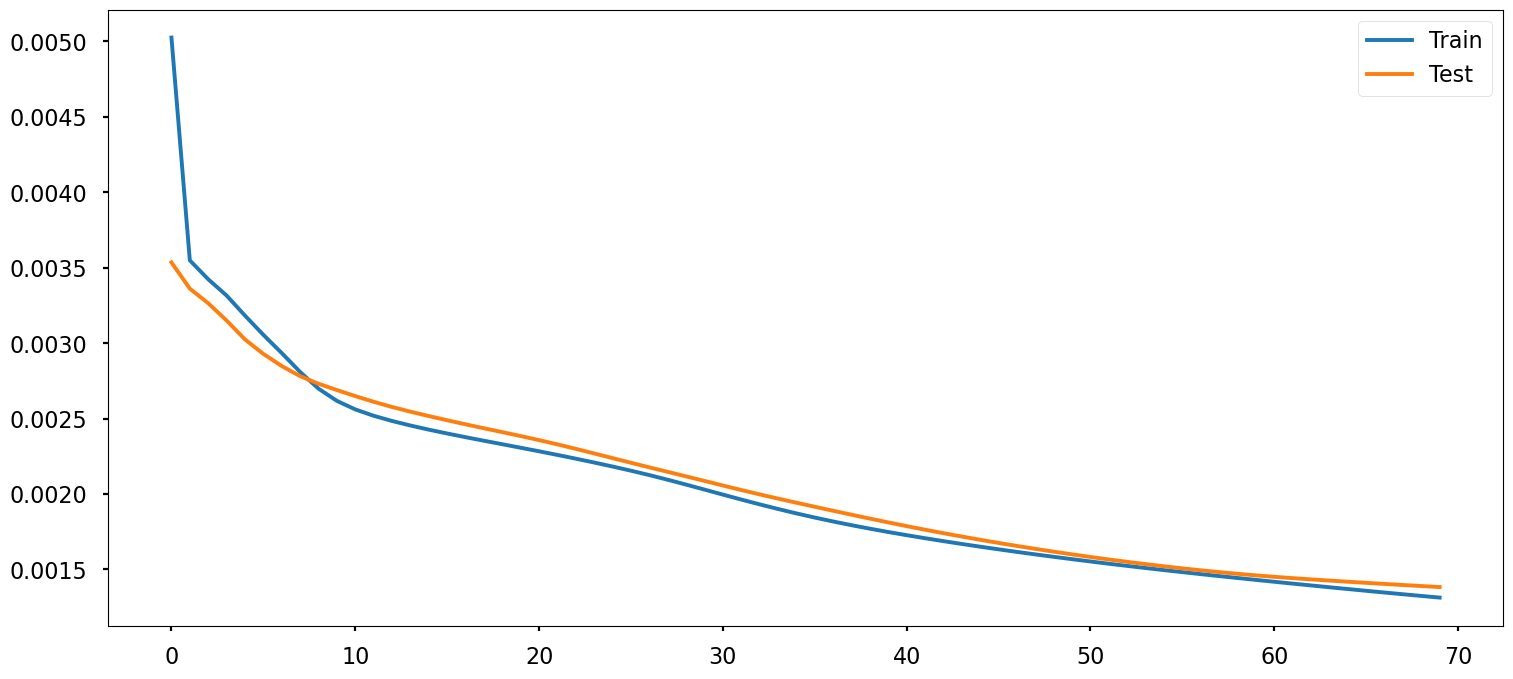

In [189]:
pyplot.plot(history.history['loss'], label='Train')
pyplot.plot(history.history['val_loss'], label='Test')
pyplot.legend()
pyplot.show()

In [190]:
sca=DataFrame(scaled)
sca.head()

0         1         2         3         4         5         6   \
0  0.046729  0.894737  0.661412  0.566187  0.215188  0.746066  0.225345   
1  0.046729  0.894737  0.660155  0.541326  0.215188  0.748871  0.225345   
2  0.037383  0.894737  0.655586  0.530502  0.215188  0.755569  0.225345   
3  0.037383  0.894737  0.650788  0.524080  0.215188  0.758685  0.225345   
4  0.046729  0.894737  0.650788  0.531419  0.215188  0.758685  0.225345   

         7         8         9   ...        12        13        14        15  \
0  0.097674  0.684038  0.653428  ...  0.764262  0.381691  0.372990  0.677290   
1  0.100000  0.682140  0.651064  ...  0.782437  0.381691  0.369239  0.678532   
2  0.102326  0.679445  0.646572  ...  0.778062  0.380037  0.365488  0.676049   
3  0.104651  0.678414  0.641489  ...  0.770949  0.380037  0.361736  0.671909   
4  0.106977  0.676727  0.639362  ...  0.762697  0.380037  0.357985  0.671909   

         16        17        18        19       20        21  
0  0.351351  0.170594  0.538462  0.500000  0.32735  0.175506  
1  0.351351  0.170594  0.533937  0.476190  0.32735  0.175506  
2  0.344745  0.170594  0.529412  0.452381  0.32735  0.175506  
3  0.341441  0.164310  0.524887  0.428571  0.32735  0.175506  
4  0.341441  0.170594  0.520362  0.404762  0.32735  0.178691  

[5 rows x 22 columns]

### 5. Test predictin models and show results

ARIMA PREDICTION

In [195]:
app_forecast=app_model_fit.forecast(steps=13)

In [196]:
np.sqrt(mean_squared_error(y_train,app_forecast))

31.921004095945595

LSTM PREDICTION

In [191]:
lstm_test_mse = model.evaluate(X_Test, Y_Test, batch_size=1)
print('Test MSE: %f'%lstm_test_mse)

5921/5921 [==============================] - 6s 1ms/step - loss: 0.0014
Test MSE: 0.001383


In [192]:
from sklearn.metrics import r2_score

y_pred_test_lstm = model.predict(X_Test)
y_train_pred_lstm = model.predict(X_Train)
print("The R2 score on the Train set is:\t{:0.3f}".format(r2_score(Y_Train, y_train_pred_lstm)))
print("The R2 score on the Test set is:\t{:0.3f}".format(r2_score(Y_Test, y_pred_test_lstm)))

432/432 [==============================] - 1s 1ms/step
The R2 score on the Train set is:	0.957
The R2 score on the Test set is:	0.956


186/186 [==============================] - 0s 2ms/step


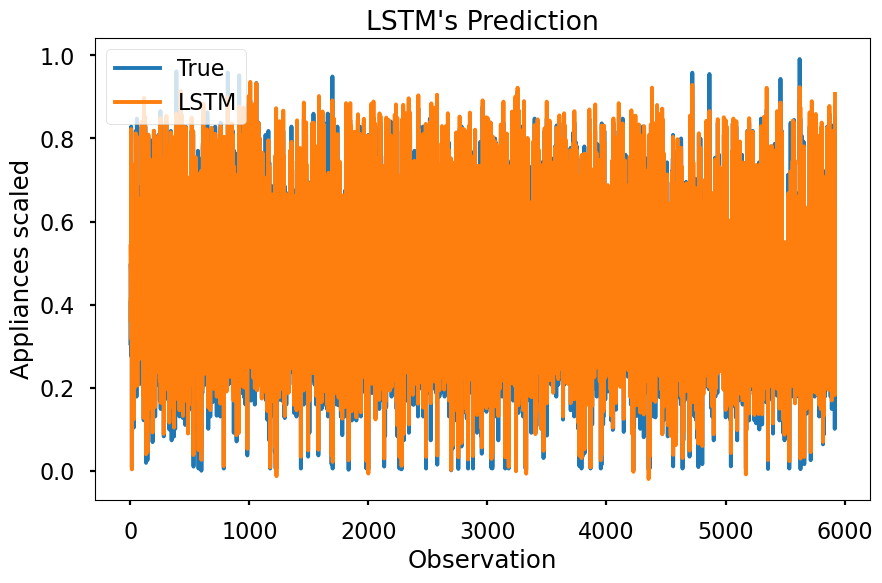

In [193]:
lstm_y_pred_test = model.predict(X_Test)
plt.figure(figsize=(10, 6))
plt.plot(Y_Test, label='True')
plt.plot(y_pred_test_lstm, label='LSTM')
plt.title("LSTM's Prediction")
plt.xlabel('Observation')
plt.ylabel('Appliances scaled')
plt.legend()
plt.show();

In [194]:
# make a prediction
yhat = model.predict(X_Test)
X_Test = X_Test.reshape((X_Test.shape[0], 21))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, X_Test[:, -21:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
Y_Test = Y_Test.reshape((len(Y_Test), 1))
inv_y = np.concatenate((Y_Test, X_Test[:, -21:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

186/186 [==============================] - 0s 1ms/step
Test RMSE: 39.799


### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

Compare with the results you have obtained in Assignment 1.

The Models used for predicting the forecasting were ARIMA(Autoregressive Integrated Moving Average) and LSTM (Long Short- Term Memory). The result from Naive bayes gave a RMSE of 40.39 and the objective was to improve the prediction and reduce the RMSE using different time-series models. The Best Model for the scenario given was ARIMA which improved the prediction and the RMSE reduced to 31.92 comparing to LSTM with RMSE 39.79. Therefore the ARIMA model is best Time Series Model for the given scenario. When compared to machine learning models used in Assignment 1, time series models have improved a lot with RMSE of 66.67 to 31.92. The forecasting is a better fit than the machine learning models.

### 7. Reflect on what you have learned by completing this assignment

This Assignment had further improved my understanding about data analytics by introducing new data with timestamp i.e time series data and how to pre-process them. The Assignment had lot of challenges which was satisfying to solve and gain lot of insights on data processing and analytics. I have also understood the usage of PACF and ACF which is crucial for ARIMA model and how to manipulate data to make it more easy to process and predict.

### 8. References